## Train a simple convnet on the Fashion MNIST dataset

In [0]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.utils import np_utils
import tensorflow as tf
import numpy as np# Note you only need to define the input data shape with the first layer. 

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
((trainX, trainY), (testX, testY))  = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [0]:
trainX.shape

(60000, 28, 28)

In [0]:
testX.shape

(10000, 28, 28)

### Find dimensions of an image in the dataset

In [0]:
trainX.shape[1:]

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
np.unique(trainY)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
trainY=np_utils.to_categorical(trainY,10)
testY=np_utils.to_categorical(testY,10)


### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
trainX =trainX/255
testX= testX/255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
trainX=trainX.reshape(trainX.shape[0],28,28,1).astype('float32')    # The digit 1 signifies the images are in grayscale
testX=testX.reshape(testX.shape[0],28,28,1).astype('float32')

### Import the necessary layers from keras to build the model

In [0]:

# The last layers is a dense layer with softmax activation that classifies the 10 categories of data in fashion_mnist.


model = tf.keras.Sequential()


### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='valid', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='valid', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_6 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               2359424   
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 2,370,282
Trainable params: 2,370,282
Non-trainable params: 0
____________________________________________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]

In [0]:
model.fit(trainX, trainY ,batch_size=64,nb_epoch=10,verbose=1,validation_data=(testX, testY),callbacks=callback_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.4967 - acc: 0.8232 - val_loss: 0.3284 - val_acc: 0.8807
Epoch 2/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3311 - acc: 0.8820 - val_loss: 0.2802 - val_acc: 0.8989
Epoch 3/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2763 - acc: 0.8990 - val_loss: 0.2611 - val_acc: 0.9061
Epoch 4/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2410 - acc: 0.9124 - val_loss: 0.2531 - val_acc: 0.9116
Epoch 5/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2106 - acc: 0.9223 - val_loss: 0.2523 - val_acc: 0.9101
Epoch 6/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1850 - acc: 0.9320 - val_loss: 0.2472 - val_acc: 0.9158
Epoch 7/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1608 - acc: 0.9398 - val_loss: 0.

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
model1 = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model1.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='valid', activation='relu', input_shape=(28,28,1))) 
model1.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='valid', activation='relu', input_shape=(28,28,1))) 
model1.add(tf.keras.layers.MaxPooling2D(pool_size=2 , padding='valid'))
model1.add(tf.keras.layers.Dropout(0.25))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(128, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model1.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               589952    
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)              

In [0]:
model1.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]

In [0]:
model1.fit(trainX, trainY ,batch_size=64,nb_epoch=10,verbose=1,validation_data=(testX, testY),callbacks=callback_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.5062 - acc: 0.8214 - val_loss: 0.3336 - val_acc: 0.8773
Epoch 2/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3392 - acc: 0.8791 - val_loss: 0.2831 - val_acc: 0.8958
Epoch 3/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2881 - acc: 0.8945 - val_loss: 0.2554 - val_acc: 0.9036
Epoch 4/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2630 - acc: 0.9046 - val_loss: 0.2486 - val_acc: 0.9082
Epoch 5/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2412 - acc: 0.9115 - val_loss: 0.2360 - val_acc: 0.9104
Epoch 6/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2228 - acc: 0.9185 - val_loss: 0.2268 - val_acc: 0.9181
Epoch 7/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2082 - acc: 0.9233 - val_loss: 0.

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
	featurewise_center=False,
	samplewise_center=False,
	featurewise_std_normalization=False,
	samplewise_std_normalization=False,
	zca_whitening=False,
	rotation_range=50,
	width_shift_range=0.1,
	height_shift_range=0.1,
	horizontal_flip=False,
	vertical_flip=False)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

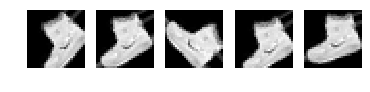

In [0]:
from matplotlib import pyplot as plt
gen = datagen.flow(trainX[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

In [0]:
trainX.shape

(60000, 28, 28, 1)

### Run the above model using fit_generator()

In [0]:
model1.fit_generator(datagen.flow(trainX,trainY, batch_size=32), validation_data=(testX, testY),steps_per_epoch=len(trainX) / 32, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.8386 - acc: 0.6923 - val_loss: 0.3705 - val_acc: 0.8718
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6600 - acc: 0.7566 - val_loss: 0.3686 - val_acc: 0.8653
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6081 - acc: 0.7753 - val_loss: 0.3704 - val_acc: 0.8695
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5769 - acc: 0.7878 - val_loss: 0.3809 - val_acc: 0.8620
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5576 - acc: 0.7961 - val_loss: 0.3871 - val_acc: 0.8634
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5414 - acc: 0.7992 - val_loss: 0.3758 - val_acc: 0.8683
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5325 - acc: 0.8043 - val_loss: 0.3711 - val_acc: 0.8699
Epoch 8/10
1875/1875 [==============================] -

###  Report the final train and validation accuracy

In [0]:
# Final evaluation of the model
scores = model1.evaluate(testX, testY, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.94%


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
# Simple CNN model for the CIFAR-10 Dataset
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

from keras.callbacks import EarlyStopping


### **Load CIFAR10 dataset**

In [0]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 40
lrate = 0.01
#decay = lrate/epochs
          
#sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] , )
model.summary()


# Fit the model

early_stopping = EarlyStopping(monitor='val_acc', patience=2, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32 , callbacks=callback_list)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)              

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen1 = ImageDataGenerator(
	featurewise_center=False,
	samplewise_center=False,
	featurewise_std_normalization=False,
	samplewise_std_normalization=False,
	zca_whitening=False,
	rotation_range=50,
	width_shift_range=0.5,
	height_shift_range=0.6,
	horizontal_flip=True,
	vertical_flip=True)

### **Prepare/fit the generator.**

In [0]:
model.fit_generator(datagen1.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test),steps_per_epoch=len(X_train) / 32, epochs=10)

Epoch 1/10
1563/1562 [==============================] - 26s 17ms/step - loss: 1.9955 - acc: 0.2661 - val_loss: 1.5635 - val_acc: 0.4486
Epoch 2/10
1563/1562 [==============================] - 26s 16ms/step - loss: 1.8866 - acc: 0.3042 - val_loss: 1.5932 - val_acc: 0.4369
Epoch 3/10
1563/1562 [==============================] - 26s 16ms/step - loss: 1.8429 - acc: 0.3206 - val_loss: 1.5055 - val_acc: 0.4647
Epoch 4/10
1563/1562 [==============================] - 26s 17ms/step - loss: 1.8185 - acc: 0.3333 - val_loss: 1.4982 - val_acc: 0.4660
Epoch 5/10
1563/1562 [==============================] - 26s 17ms/step - loss: 1.8016 - acc: 0.3414 - val_loss: 1.5153 - val_acc: 0.4550
Epoch 6/10
1563/1562 [==============================] - 26s 17ms/step - loss: 1.7886 - acc: 0.3473 - val_loss: 1.5154 - val_acc: 0.4568
Epoch 7/10
1563/1562 [==============================] - 26s 17ms/step - loss: 1.7688 - acc: 0.3534 - val_loss: 1.4744 - val_acc: 0.4692
Epoch 8/10
1563/1562 [==========================

In [0]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 43.68%


### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

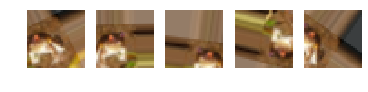

In [0]:
from matplotlib import pyplot as plt
gen = datagen1.flow(X_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()